ARIMA

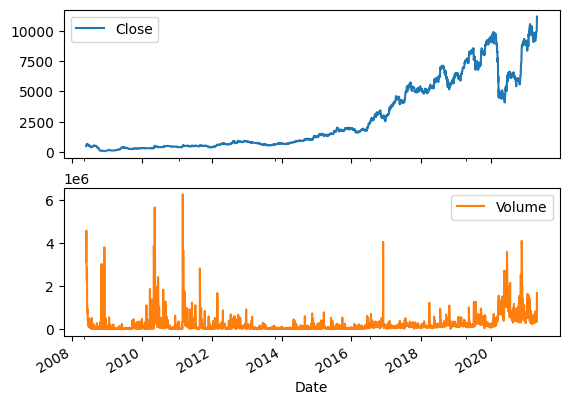

In [7]:
import pandas as pd
baj_df = pd.read_csv("/content/BAJAJFINSV.csv", index_col="Date", parse_dates=True)
baj_df.head(3)

baj_df[["Close","Volume"]].plot(subplots=True, layout=(2,1));

ADF Test Results for Close Prices:
ADF Statistic: 0.5653524010639475
p-value: 0.9867297500676575
Critical Values: {'1%': -3.4324099910200605, '5%': -2.8624501783666307, '10%': -2.5672545087086727}
The time series is likely non-stationary.


<Figure size 1200x600 with 0 Axes>

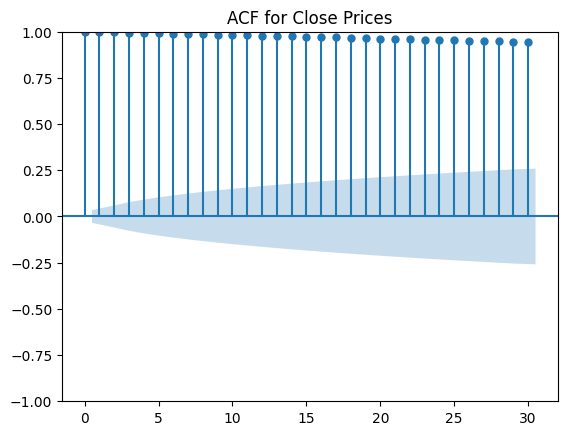

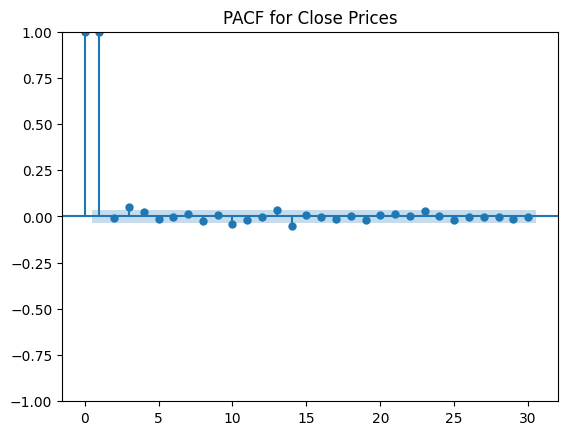

ARIMA Results:
MSE: 51925.21992673366
MAE: 151.10037268769793
RMSE: 227.87105987100173


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Read the CSV file
baj_df = pd.read_csv("/content/BAJAJFINSV.csv", index_col="Date", parse_dates=True)

# Extract "Close" column
df = baj_df[["Close"]]

# Perform ADF test for stationarity
def adf_test(series, name=""):
    result = adfuller(series, autolag="AIC")
    print(f'ADF Test Results for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

adf_test(df["Close"], name="Close Prices")

# Plot ACF and PACF for "Close"
plt.figure(figsize=(12, 6))
plot_acf(df["Close"], lags=30, title="ACF for Close Prices")
plot_pacf(df["Close"], lags=30, title="PACF for Close Prices")
plt.show()

# Split the data into training and testing sets
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

# Extract the "Close" column for ARIMA
train_arima = train_data['Close']
test_arima = test_data['Close']

# ARIMA model
history = [x for x in train_arima]
y = test_arima
predictions = list()

for i in range(len(y)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[i])

# Evaluate ARIMA performance
mse_arima = mean_squared_error(y, predictions)
mae_arima = mean_absolute_error(y, predictions)
rmse_arima = math.sqrt(mse_arima)

# Print ARIMA results
print('ARIMA Results:')
print(f'MSE: {mse_arima}')
print(f'MAE: {mae_arima}')
print(f'RMSE: {rmse_arima}')


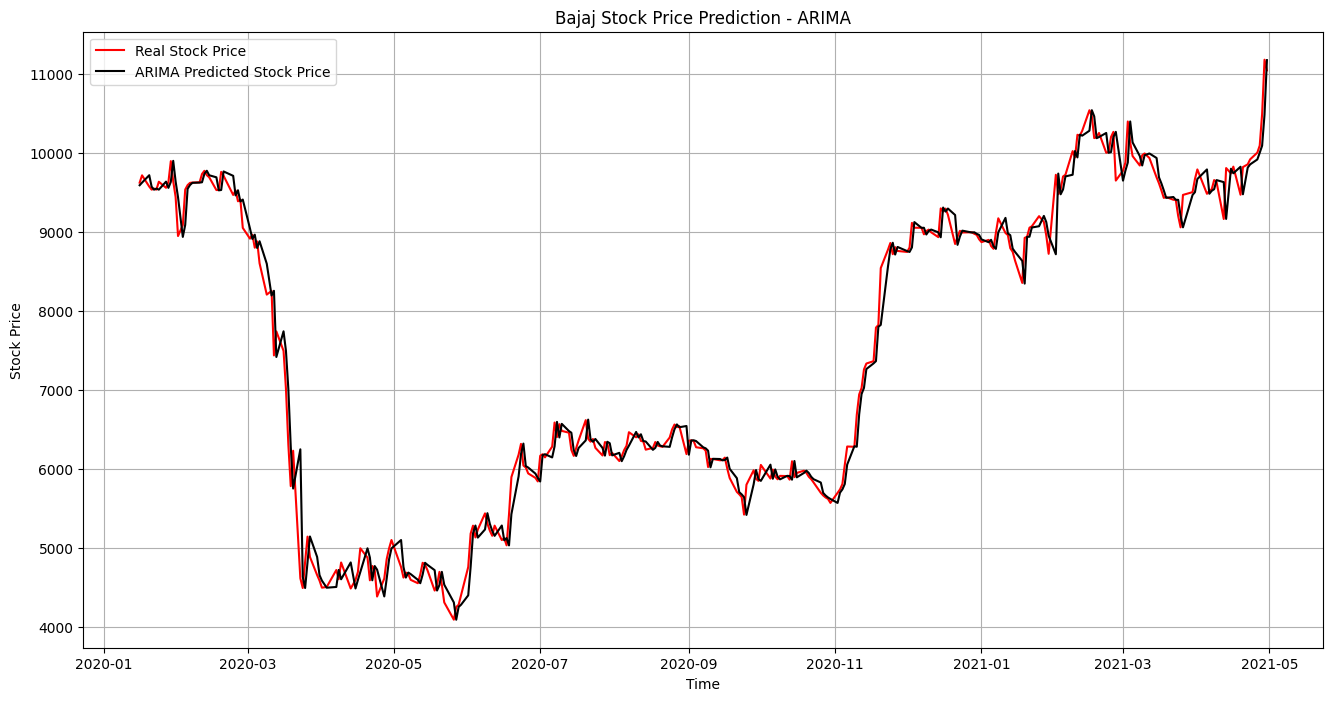

In [5]:
# Plotting ARIMA predictions
plt.figure(figsize=(16, 8))
plt.plot(test_data.index[:len(predictions)], y[:len(predictions)], color='red', label='Real Stock Price')
plt.plot(test_data.index[:len(predictions)], predictions, color='black', label='ARIMA Predicted Stock Price')
plt.title('Bajaj Stock Price Prediction - ARIMA')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_predictions.png')
plt.show()

#LSTM STOCK PREDICTION

Epoch 1/50
90/90 [==============================] - 4s 12ms/step - loss: 0.0075
Epoch 2/50
90/90 [==============================] - 1s 14ms/step - loss: 1.4128e-04
Epoch 3/50
90/90 [==============================] - 2s 18ms/step - loss: 1.0005e-04
Epoch 4/50
90/90 [==============================] - 1s 13ms/step - loss: 1.0110e-04
Epoch 5/50
90/90 [==============================] - 1s 11ms/step - loss: 1.0607e-04
Epoch 6/50
90/90 [==============================] - 1s 8ms/step - loss: 9.4742e-05
Epoch 7/50
90/90 [==============================] - 1s 7ms/step - loss: 1.0035e-04
Epoch 8/50
90/90 [==============================] - 1s 7ms/step - loss: 9.0126e-05
Epoch 9/50
90/90 [==============================] - 1s 8ms/step - loss: 9.3467e-05
Epoch 10/50
90/90 [==============================] - 1s 8ms/step - loss: 9.3116e-05
Epoch 11/50
90/90 [==============================] - 1s 8ms/step - loss: 8.5749e-05
Epoch 12/50
90/90 [==============================] - 1s 8ms/step - loss: 9.2485e-05


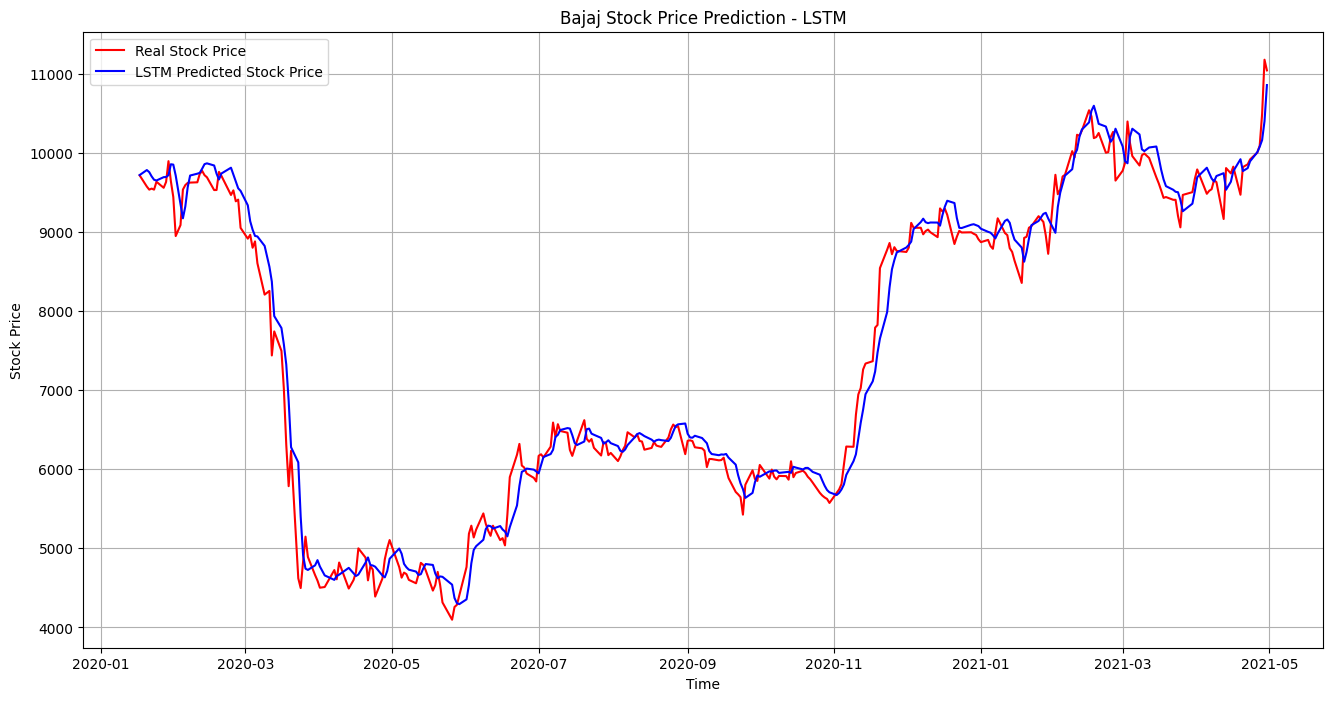

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Read the CSV file
baj_df = pd.read_csv("/content/BAJAJFINSV.csv", index_col="Date", parse_dates=True)

# Extract "Close" column
df = baj_df[["Close"]]

# Scale the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Set sequence length and create sequences
sequence_length = 10
x, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split = int(0.9 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# Reshape input data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build and train LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Inverse transform y_test for plotting
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate LSTM performance
mse_lstm = mean_squared_error(y_test_inv, predictions_lstm)
mae_lstm = mean_absolute_error(y_test_inv, predictions_lstm)
rmse_lstm = math.sqrt(mse_lstm)

# Print LSTM results
print('\nLSTM Results:')
print(f'MSE: {mse_lstm}')
print(f'MAE: {mae_lstm}')
print(f'RMSE: {rmse_lstm}')




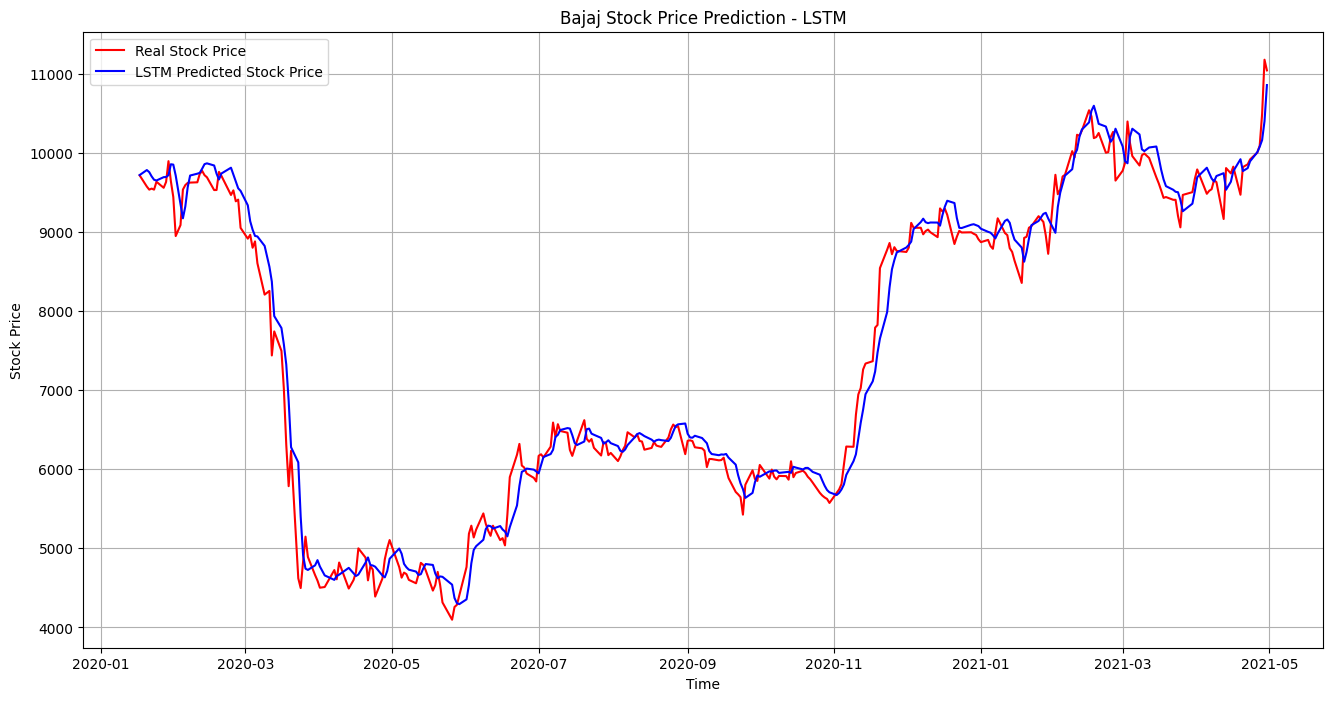

In [ ]:
# Plotting LSTM predictions
plt.figure(figsize=(16, 8))
plt.plot(baj_df.index[-len(y_test_inv):], y_test_inv, color='red', label='Real Stock Price')
plt.plot(baj_df.index[-len(y_test_inv):], predictions_lstm, color='blue', label='LSTM Predicted Stock Price')
plt.title('Bajaj Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compare ARIMA and LSTM results
print('\nComparison:')
print(f'ARIMA RMSE: {rmse_arima}')
print(f'LSTM RMSE: {rmse_lstm}')



Comparison:
ARIMA RMSE: 227.87105987100173
LSTM RMSE: 280.47407649882524
